<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="100%" height="100%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 통계(Statistics)

### 기술 통계 vs 추론 통계 (Descriptive vs Inferential Statistics)

기술적 통계: 데이터를 설명(예: 평균, 중간값, 표준 편차, 분산 등)

추론 통계: 데이터를 일반화해서 예측/추론에 사용 (예: 회귀 등) -> 기계학습(통계적 학습) -> 딥러닝(뉴럴 네트워크 사용)

### 데이터셋

신체 측정 데이터셋 [Kaggle body measurements dataset](https://www.kaggle.com/datasets/mexwell/body-measurements/data)

In [1]:
import kagglehub

path = kagglehub.dataset_download("mexwell/body-measurements")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jmhong\.cache\kagglehub\datasets\mexwell\body-measurements\versions\1


In [2]:
import pandas as pd

data = pd.read_csv(path + "/bdims.csv")

# data = data[data["sex"] == 0] # 데이터 필터링을 하고 싶은 경우

data.head()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [3]:
data.tail()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
502,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,0
506,35.6,29.0,29.0,20.4,26.8,13.4,10.8,18.7,13.8,100.5,...,33.2,25.5,39.6,35.9,23.0,16.4,38,67.3,163.8,0


### 히스토그램(Histogram)

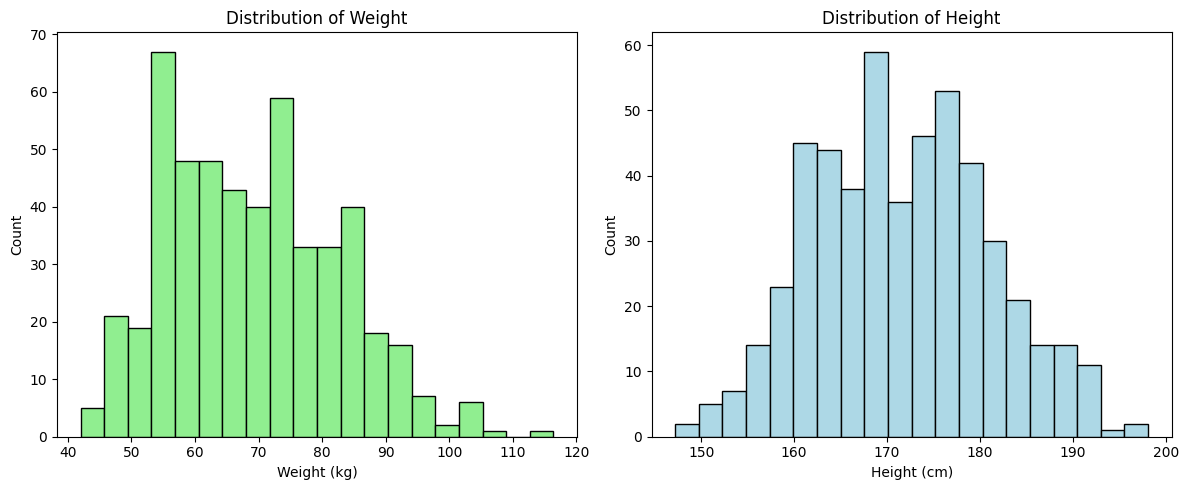

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

counts, bins, _ = axes[0].hist(data['wgt'], bins=20, color='lightgreen', edgecolor='black')

# for b, c in zip(bins, counts):
#     print(b, c / np.sum(counts)) # <- 출력해서 확인해보고 싶은 경우

axes[0].set_title('Distribution of Weight')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Count')

axes[1].hist(data['hgt'], bins=20, color='lightblue', edgecolor='black')
axes[1].set_title('Distribution of Height')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 정규 분포(Normal Distribution)


정규분포의 최대우도추정(Maximum Likelihood Estimation) 예시

69.14753451676529 13.33259448777453


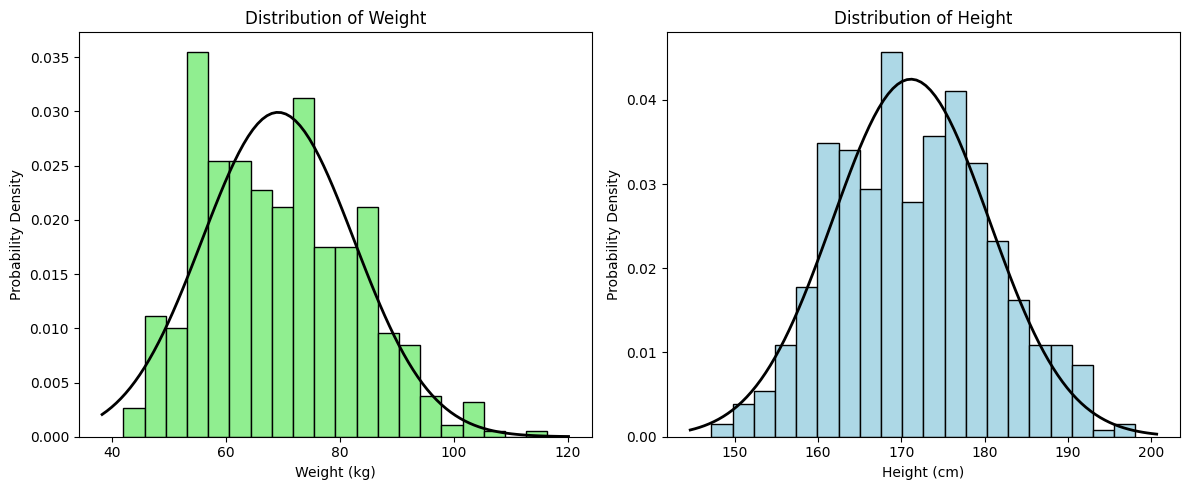

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(data['wgt'], bins=20, color='lightgreen', edgecolor='black', density=True)
axes[0].set_title('Distribution of Weight')
axes[0].set_xlabel('Weight (kg)')
axes[0].set_ylabel('Probability Density')

mu_wgt, std_wgt = norm.fit(data['wgt'])  # <- Maximum Likelihood Estimation (MLE)
print(mu_wgt, std_wgt)
xmin_wgt, xmax_wgt = axes[0].get_xlim()
x_wgt = np.linspace(xmin_wgt, xmax_wgt, 100)
p_wgt = norm.pdf(x_wgt, mu_wgt, std_wgt)
axes[0].plot(x_wgt, p_wgt, 'k', linewidth=2)

axes[1].hist(data['hgt'], bins=20, color='lightblue', edgecolor='black', density=True)
axes[1].set_title('Distribution of Height')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Probability Density')

mu_hgt, std_hgt = norm.fit(data['hgt'])
xmin_hgt, xmax_hgt = axes[1].get_xlim()
x_hgt = np.linspace(xmin_hgt, xmax_hgt, 100)
p_hgt = norm.pdf(x_hgt, mu_hgt, std_hgt)
axes[1].plot(x_hgt, p_hgt, 'k', linewidth=2)

plt.tight_layout()
plt.show()

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

- f(x) : 정규 분포의 확률 밀도 함수 (PDF: Probability Density Function)
- $\mu$ : 평균
- $\sigma$ : 표준 편차 (the standard deviation)
- $\sigma^2$ : 분산 (variance)

[Why π is in the normal distribution (beyond integral tricks)](https://youtu.be/cy8r7WSuT1I?si=cIhL1XvMcGVLVnnL)

# 참고: 중심극한정리(Central Limit Theorem)

모집단의 분포가 어떤 모양이든 상관없이, 표본의 크기가 충분히 크면 표본 평균의 분포는 정규분포에 근사한다.

- [Central limit theorem But what is the Central Limit Theorem?](https://youtu.be/zeJD6dqJ5lo?si=gIg1p9RX91D8qx13)

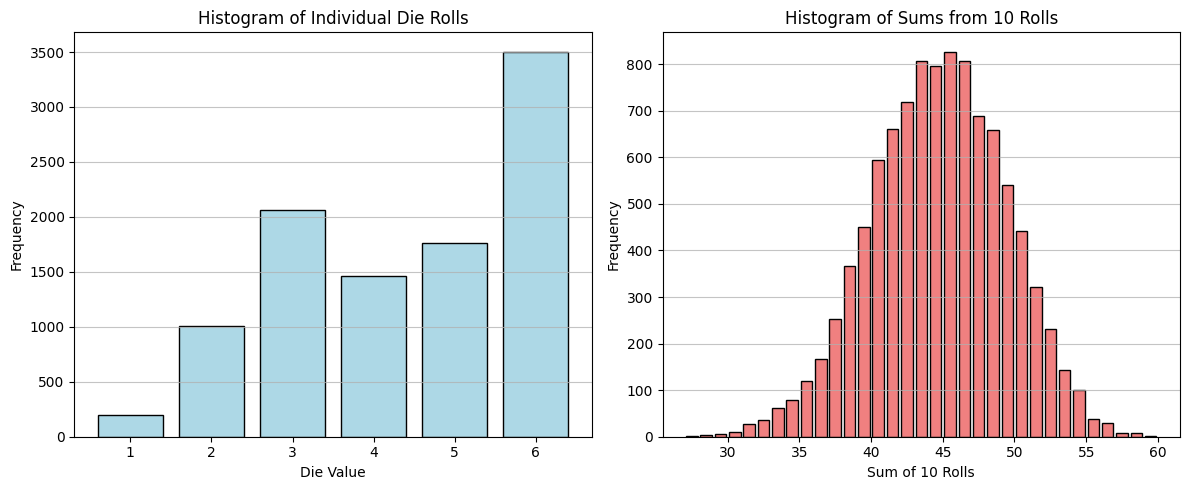

In [11]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = [0.02, 0.1, 0.2, 0.15, 0.18, 0.35]  # Updated probabilities for numbers 1 to 6
#probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
numbers = [1, 2, 3, 4, 5, 6]  # Updated numbers

# Simulate 10000 individual rolls
individual_rolls = np.random.choice(numbers, size=10000, p=probabilities)

# Simulate 10000 sets of 10 rolls and compute their sums
sum_rolls = [sum(np.random.choice(numbers, size=10, p=probabilities)) for _ in range(10000)]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for individual rolls (light blue)
ax1.hist(individual_rolls, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='black', align='mid', rwidth=0.8, color='lightblue')
ax1.set_xlabel('Die Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Individual Die Rolls')
ax1.set_xticks(numbers)
ax1.grid(axis='y', alpha=0.75)

# Histogram for sums of 10 rolls (light red)
ax2.hist(sum_rolls, bins=range(min(sum_rolls), max(sum_rolls) + 2), edgecolor='black', align='mid', rwidth=0.8, color='lightcoral')
ax2.set_xlabel('Sum of 10 Rolls')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Sums from 10 Rolls')
ax2.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### 산점도(Scatter Plot)



In [7]:
import altair as alt
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("mexwell/body-measurements")
data = pd.read_csv(f"{path}/bdims.csv")

scatter_plot = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('wgt', title='Weight (kg)'),
    y=alt.Y('hgt', title='Height (cm)'),
    tooltip=['wgt', 'hgt']
).interactive().properties(width=800, height=300)

scatter_plot

alt.Chart(...)

# 회귀(Regression) 분석

독립 변수들 사이의 관계를 추측하는 과정

어원: 19세기 논문에서 평균으로 돌아가는(회귀하는) 경향이 있다는 의미 [Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)


### 선형 회귀(Linear Regression)

[Vega-Altair Regression Transform](https://altair-viz.github.io/user_guide/transform/regression.html#regression) (ordinary least squares 사용)

In [12]:
import altair as alt
import pandas as pd

# Base scatter plot
scatter = alt.Chart(data).mark_circle(size=60).encode(
    x=alt.X('wgt', title='Weight (kg)'),
    y=alt.Y('hgt', title='Height (cm)'),
    tooltip=['wgt', 'hgt']
).properties(width=800, height=300)

# Regression line
regression = alt.Chart(data).mark_line(color='red').transform_regression(
    'wgt', 'hgt', method='linear'
).encode(
    x='wgt:Q',
    y='hgt:Q'
)

print(regression)

# Combine the plots
final_plot = (scatter + regression).interactive()

final_plot

alt.Chart(...)


alt.LayerChart(...)

In [9]:
import pandas as pd
from scipy.stats import linregress
# Assume 'data' is your pandas DataFrame with 'wgt' and 'hgt' columns

# Perform the linear regression
# linregress returns: slope, intercept, rvalue, pvalue, stderr
slope, intercept, r_value, p_value, std_err = linregress(data['wgt'], data['hgt'])

# Print the constants
a = slope
b = intercept

print(f"The slope (a) is: {a:.4f}")
print(f"The intercept (b) is: {b:.4f}")
print(f"The regression equation is approximately: hgt = {a:.4f} * wgt + {b:.4f}")

# Note: Altair uses these same calculated values internally to draw the line.

print(a * 110 + b)  # 예측값

The slope (a) is: 0.5056
The intercept (b) is: 136.1819
The regression equation is approximately: hgt = 0.5056 * wgt + 136.1819
191.79934736460572


[참고] 선형대수학에서 얘기하는 선형(linear) 변환은 $b$가 없는 $y = ax$ 이고 $y = ax + b$는 애파인(affine) 변환이 됩니다. 그렇다고 통계학에서 linear regression 대신에 affine regression 같은 용어를 사용하지는 않습니다. ([$y = \begin{bmatrix} a & b \end{bmatrix} \cdot \begin{bmatrix} x \\ 1 \end{bmatrix}$와 같이 표현가능](https://ai.stackexchange.com/questions/28705/is-there-any-difference-between-affine-transformation-and-linear-transformation))

### 이어지는 내용들

- 위와 같이 연속적인 값을 예측하고 싶은 경우를 회귀 문제라고 합니다. 그렇다면 "이거 아니면 저거"와 같은 분류 문제는 어떻게 해야할까요?
- 가설이 직선형태보다 훨씬 더 복잡한 경우(또는 복잡해야 하는 경우)에 대해서 어떻게 해야 할까요?